# Machine Learning with SKLearn and Python

Once we have gotten ourselves acquainted with python and use of Pandas to work with data we are ready to work with a few of the libraries in Python to make predictions.

In Machine learning we will be looking at Supervised and Unsupervised models as well as Regressors and Classifyers.

For Regressors there are the following methods available:

* Simple Linear Regression
* Multiple Linear Regression
* Polynomial Regression
* Support Vector Regression
* Regression Trees
* Random Forest

For the Classifiers we will look at:

* Logistic Regression
* KNN
* Classification Trees
* Random Forest
* SVM
* Kernel SVM
* Naive Bayes

For all of the methods that we will be looking at we will need to load in a relevant data set and also import the correct classifier to make the prediction and fit the data.

## Regression vs Classification

The best way to think about the differences is the final outcome. With a Regression we have a numerical value that we are trying to predict so the values could be anything between a maximum and a minimum value (For instance price or Mark Achieved), with Classification we are predicting a categorical
variable (So a variable in which you have to fit one of multiple pre-described classes (Gender or age group for instance).

# Regressors:

## Linear Regression Theory

Linear regression attempts to create weighted estimates for the coefficients of the input features plus the constant terms (or intercept). One of the
main objectives is to create the estimates in such a way that we minimize the error term. For instance we could use the Mean Squared Error (MSE) as a metric
to how well the model is fitting, with the objective to minimize this metric.

Within **SKlearn** the **LinearRegression** method is based on the least squares method which can also be called directly from **SKLearn**.

The computation time of the **LinearRegression** gets very slow as the number of features increases based on the standard transformations that take place
in the background however once the model has been fitted the predictions are generally very fast.

## Simple linear Regression

Simple linear regression is the most simple form of a regression model, this model we are predicting our dependent variable $Y$ with only a single independent variable $X$.

If we were to look at the overall function we are fitting we have the following $y=b_0 + b_1x_1$. 

In this example we have data on the salary of an employee and their years of experience. We will be using this information to see if we can predict the Salary they should Achieve.


The first part is the import of the data to use it:

In [1]:
import pandas as pd

dataset = pd.read_csv('data\\Salary_Data.csv')
x = dataset.iloc[:,0].values
y = dataset.iloc[:,1].values

As we only have $n=30$ we will not split the sample into a train and test set.  

now that we have the dataset imported we can import the Regressor and make our first prediction model:

In [2]:
from sklearn.linear_model import LinearRegression
# noinspection SpellCheckingInspection
slregressor = LinearRegression()
slregressor.fit(x.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We have now fitted the model.

All of the information relating to the fitted model is contained in the instance we have created of the LinearRegression object.

Let's have a look at some of the variables we can obtain from this fitted model:

In [3]:
print("Intercept: " + str(slregressor.intercept_))
print("Coefficient: " + str(slregressor.coef_))

Intercept: 25792.20019866871
Coefficient: [9449.96232146]


This is certainly not the output that most people are used to as we are not getting a single output will all of the details we need but rather we need to call up the individual items we require. This may not be what we are expecting but we will be looking at a different library later that will provide similar output to what we are used to.

Now that we have fitted the model let's start by running some predictions using the model:

In [4]:
slregressor.predict([[6.5]])

array([87216.95528813])

We can now say that a person with 6.5 years worth of experience should be earning a salary of 87 217. But we may not always want to predict a single item, so let's plot the line we have fitted to the data:

Text(0.5, 1.0, 'Expected Salary based on years of experience')

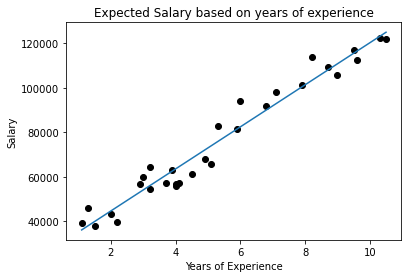

In [5]:
import matplotlib.pyplot as plt

plt.scatter(x,y,color='black')
plt.plot(x,slregressor.predict(x.reshape(-1,1)))
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Expected Salary based on years of experience")

This was simple enough and we can see the overall graph that was fitted. But we won't always have just one independent variable and will need to look at an example with more independents.

## Multiple Linear Regression

This method is very similar to the simple Linear Regression where we are fitting a straight line to the data however the big difference is the number of independent variables that we have in the model to predict the data, so the function now looks like this:

 - $Y=b_0 + b_1 x_1 + b_2 x_2 + ... + b_n x_n$
 
 In our example for Multiple linear regression we will be predicting the profit of a company based on R & D Spend, Administration, Marketing Spend and the state.
 
 We will need to do a bit of data clean up as we can't insert text into the model for prediction (So will need to create dummy variables.
 

In [6]:
dataset=pd.read_csv('data\\50_Startups.csv')

y = dataset.iloc[:,4]
x = dataset.iloc[:,:3]
x_dummy = pd.get_dummies(dataset.iloc[:,3])
x = x.join(x_dummy.iloc[:,:-1],how='right')

Now we have a new function that we can use, **get_dummies** from **pandas**, this will take any text columns and create the dummy variables from the text. We must also just remember to remove one of the dummies as we run the model with $n-1$ dummies if they are exclusive.

Let's now fit the model, we will be using the same created instance as the simple linear regression:

In [7]:
slregressor.fit(x,y)

print('Intercept: ' +str(slregressor.intercept_))
print('Coefficients: '+str(slregressor.coef_))

Intercept: 50083.45681250342
Coefficients: [ 8.06023114e-01 -2.70043196e-02  2.69798610e-02  4.18870191e+01
  2.40675812e+02]


The only problem with this is we can't use a forward or backward method to see which variables to include or exclude as we don't have the p-values.

So we will now have a look at a different library (Which was mentioned earlier that will show us a lot more information).

This model also does not automatically include an intercept so we need to add one in manually.

In [8]:
import statsmodels.api as sm

x=sm.add_constant(x)  
reg2 = sm.OLS(endog=y,exog=x)

reg2.fit().summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sat, 08 Aug 2020   Prob (F-statistic):           1.34e-27
Time:                        21:47:00   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.008e+04   6952.587      7.204      0.000    3.61e+04    6.41e+04
R&D Spend           0.8060      0.046     17.369      0.000       0.712       0.900
Administration     -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing Spend     0.0270      0.017      1.574      0.123      -0.008       0.062
California         41.8870   3256.039      0.013      0.990   -6520.229    6604.003
Florida           240.6758   3338.857      0.072      0.943   -6488.349    6969.701
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.47e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now this look more like the variables we are used to to with all of the measures and the P-values for the coefficients to make decisions around which of the variables should be included and removed.

We also see that there are some warning that have been brought to our attention including a Multicollinearity warning, Let's see how we can run a Vif score to check for Multicollinearity:

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = pd.DataFrame()
VIF['Features']=x.columns
VIF['VIF']  = [variance_inflation_factor(exog=x.values,exog_idx=i) for i in range(x.shape[1])]
VIF


,Features,VIF
0,const,27.126379
1,R&D Spend,2.495511
2,Administration,1.177766
3,Marketing Spend,2.416797
4,California,1.335061
5,Florida,1.361299



From this point we can keep rerunning the models until we have removed all of the variables that are not significant in the overall model and if there is multicollinearity in the model we can control for it.

## Gradient Descent

If we are needing to fit a Linear Regression model but have a large number of features or instances to fit in the memory we can use *Gradient Descent* rather than a standard Linear Regression model.

*Gradient Descent* is a generic optimization algorithm capable of finding optimal solutions to a wide variety of problems with the general idea to tweak parameters
iteratively in order to minimize the cost function.

The general idea behind the algorithm is to tweak the Hyper Parameters iteratively until the cost function has reached a minimum. In order to do this
*GD* measures the gradient of the local error term and estimates towards the lower point. The starting point is random values which are then changed
to reach the minimum.

One of the Key variables in *GD* is the size of the steps (Determined by the learning rate Hyperparameter). If this value is
too small then the algorithm will have to go through a large number of iterations before Convergene is reached, if the value
is too high then the algorithm may jump of the low point and even higher then currently and cause Divergence.

Not all of our cost functions will have a single Global minimum but could also have some local minimums, while this does not seem to be a major problem
we need to consider the case where we start our random value on one of the sides of a local minimum, so it will reach the local
minimum, it may consider this as converged where there is actually values that would produce a smaller value for the cost function.

With Linear models the MSE cost function is a convex function with no abrupt changes to the slope, meaning that there will
only be one minimum so this algorithm is ideal for this model.

As the learning rate is a key Hyperparameter to this algorithm, we can find the optimal point by using a Grid Search.

### Batch Gradient Descent

To implement Gradient Descent the gradient of the cost function needs to be calculated with regard
to each model parameter (Partial Derivative). Once these gradients have been calculated the algorithm uses
the learning rate and the gradient to determine the next step in the process.

With *Batch Gradient Descent* you use the full data to compute the Gradients at every step which could cause
a longer estimation time with larger training sets.

### Stochastic Gradient Descent

At the opposite end of Gradient Descent algorithm is Stochastic Gradient Descent. This method picks a random instance
in the training set at every step and computes gradients based on the single instances. As we only
work with single instances the training time is reduces as we are only dealing with only one instance.

The other advantage of working with one instance at a time is offers a lot more capabilities in terms of working
with larger data sets as this is a lower memory requirement.

Due to the Stochastic (Random) nature of this algorithm the cost function will fluctuate more rather than decreasing over iterations.
OVer time it will end up really close to the minimum and even if it finds the Global minimum for the cost function
it could still increase due to the Random nature. This means that the final values we obtain will be good,
just not necessarily the optimal values.

When the cost function is very irregular,this can help the algorithm jump out of a local minimum
and a better chance to find the global minimum than *Batch Gradient Descent*.

One solution to the big jumps is to gradually reduce the learning rate when running. The function that uses
the learning rate at every iteration is called the *learning schedule*.

By Convention of the Algorithm it is iterated by rounds of m iterations, with each round called and
*Epoch*.

When using *Stochastic Gradient Descent* the requirement is the training instances must be independently and
identically distributed, one way to do this is to shuffle the instances during training.

Implementation using **SKLearn**:

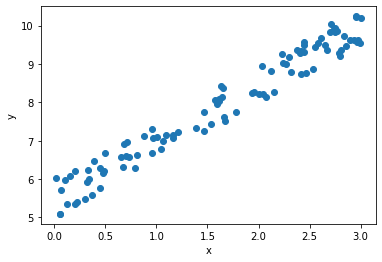

In [10]:
import numpy as np
import matplotlib.pyplot as plt
x_rand = np.random.rand(100,1)*3
y_rand = 5 +1.5* x_rand + np.random.rand(100,1)
plt.scatter(x_rand,y_rand)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [11]:
from sklearn.linear_model import SGDRegressor

x.drop(['const'],axis=1,inplace =True)
sgd_reg = SGDRegressor(penalty='none',max_iter=1000,tol=1e-3,eta0=0.1)
sgd_reg.fit(x_rand,y_rand)

sgd_reg.intercept_,sgd_reg.coef_

c:\users\poisson\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([5.46009693]), array([1.48908572]))

In [12]:
from sklearn.linear_model import LinearRegression

ols = LinearRegression()
ols.fit(x_rand,y_rand)
ols.intercept_,ols.coef_

(array([5.47179496]), array([[1.50581509]]))

As we can see from the results above the results are very similar between the *OLS* and *SGD* solutions.

### Mini Batch Gradient Descent

This is the final Gradient Descent and easy to understand with the understanding of Stocastic and Batch methods. at every
step the algorithm computes the gradients on a random set of the instances rather than the full set or a single instance.

The main advantage of Mini Batch versus Stochastic is the performance boost from the hardware operations especially when training using GPU's.

There are a few Hyperparameters in the **SKLearn** implemention of the algortihm:
 * tol - this is the cut off point for the Cost function to flag completion.
 * eta - this is the learning rate
 * penalty - this is the level of regularization, at this point it has none.
 * max_iter - the maximum number of Epochs

## Polynomial regression

This is a non linear model but the regression formula is still additive so we can use OLS on this model. 

For this technique and the future techniques we will be using the same data which is the prediction of salary based on a person's level in the business. 

Let's consider the data and see the type of function that can be fitted:

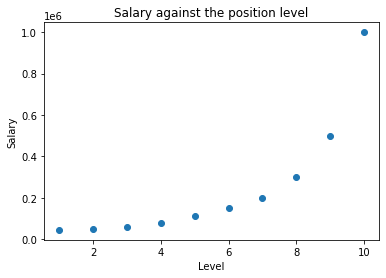

In [13]:
dataset = pd.read_csv('data\Position_Salaries.csv')
plt.scatter(dataset.loc[:,'Level'],dataset.loc[:,'Salary'])
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Salary against the position level")
plt.show()

As we can see the data does not have a linear relationship so we need to use a different prediction method for it.

For Polynomial Regression we are fitting polynomials to the data based on a certain degree. So degree 2 we are fitting the following:

$Y = b_0 + b_1 x_1 + b_2 x_1^2$

This is done via a transformation to our original independent variable:

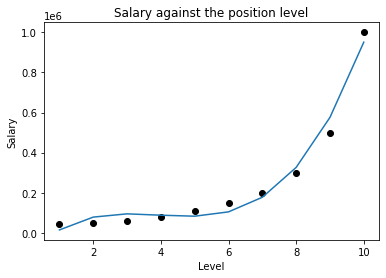

In [14]:
y = dataset.loc[:,'Salary'].values
x = dataset.loc[:,'Level'].values
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)

x_poly = poly_reg.fit_transform(x.reshape(-1,1))
pd.DataFrame(x_poly)

slregressor.fit(x_poly,y)

plt.plot(x,slregressor.predict(x_poly))
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Salary against the position level")
plt.scatter(x,y,c='black')
plt.show()

As we can see the shape of the fitted line is now closer to the overall fit of the data, we can possibly get this line closer to the data by increasing the degree (But we are just showing the overall shape of the model for this example).

Since we are fitting a model with a degree of 3 the formula looks like the following:

$Y = b_0 + b_1 x_1 + b_2 x_1^2 + b_3 x_1^3$ 

Now let's say we want to do a single prediction for this model - we will need to transform the variable in the input:

In [15]:
prediction = slregressor.predict(poly_reg.fit_transform([[6]]))
print("Salary for level 6 of the job:" + str(round(prediction[0],2)))


Salary for level 6 of the job:104820.51


It is key to remember when working with the **PolynomialFeatures** transformation that it will do all of the interaction effects and not just a single effect at a time. For instance:

if the model is $a + b$ the **PolynomialFeatures** will not only create $a^2$, $a^3$,$b^2$ and $b^3$ but also
$ab$,$a^2b$ and $ab^2$

## Regularized Linear Models

As mentioned in the Machine Learning Theory a good way to reduce overfitting is by regularisizng the model (include constraints).
The fewer the degrees of freedom it has, the harder it will be for it to overfit the data.

A simple way to think about this method is looking at a polynomial model. If we include enough polynomial terms the model will be able to overfit the data, however we
can regularize the model by decreasing the number of polynomial terms that the model is predicting.

For a linear model, regularization is typically done through constraining the weights of the model. There are a few models that implements these constraints.

### Ridge Regression

This is a regularized version of Linear Regression, Which adds a penalty to the cost function of the Sum of the squared model Coefficients, this forces
the model to fit the data and keep the weights as low as possible as any increases to the coefficients will increase the cost function.

it is important to remember that the Regularization term is only applied to the training data and not the test data

The hyperparameter $\alpha$ controls how much the model is going to be regularized, if this value is 0 then the Ridge Regression is just a Linear regression, while a very large
value will cause the coefficients to be close to 0.

Before running a ridge regression we need to ensure that the data is Standardized using the **StandardScaler**

This can be done through **SKLearn** using the following code:

In [16]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

ridge_reg = Ridge(alpha=1,solver="cholesky")
ridge_reg.fit(x_rand.reshape(-1,1),y_rand.reshape(-1,1))

ridge_reg.intercept_,ridge_reg.coef_

(array([5.49781211]), array([[1.48975572]]))

This can also be done using the Stocastic Gradient Descent model, this is by chaning the penalty Hyperparameter to set it to l2. The reason we
do this is the penalty of the coeificients is equal to $\frac{1}{2}$. This can be done in *SKlearn* as below:

In [29]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(x_rand,y_rand)
sgd_reg.intercept_,sgd_reg.coef_

c:\users\poisson\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([5.11964837]), array([1.67777262]))

### Lasso Regression

Also know as Least Absolute Shinkage and Selection Operator Regression is another regularization version of Linear Regression.

Just like **Ridge Regression** it adds a regularization term to the cost function but the main difference between the two is Lasso Regression
adds a $l_1$ norm of the weight or the summation of $\frac{1}{1}$.

One of the key characteristics of Lasso Regression is it tends to eliminate the weights of the least important features (by setting them to zero).
This means that Lasso Regression does automatic feature selection and outputs a sparse model.

Finally this again can be run in **SKlearn** for both Linear and SGD Regression:

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x_rand,y_rand)
lasso_reg.intercept_,lasso_reg.coef_

In [ ]:
sgd_reg = SGDRegressor(penalty="l1")
sgd_reg.fit(x_rand,y_rand)
sgd_reg.intercept_,sgd_reg.coef_

The Alpha term is the weighting applied to the penalty.

### Elastic Net

Elastic Net is the middle ground between Ridge and Lasso Regression. The regularization
term is a simple mix of both Ridge and Lasso's regularization terms and we have control
of the mix ratio using an r value. When r = 0 it is equivalent to a Ridge Regression while
an r value of 1 will be equivalent to a Lasso regression.

This again can be called in ***SKlearn**:

In [ ]:
from sklearn.linear_model import ElasticNet

el_reg = ElasticNet(l1_ratio=0.5,alpha=0.1)
el_reg.fit(x_rand,y_rand)

el_reg.intercept_,el_reg.coef_


With the code above we use the l1 ratio to determine the ration between the two regularization
terms.

### Usage

The key question is when should plain Linear regression and regularized regression be used and
the answer is slightly simple then we think, it is always preferable to have a slight regularizations
and evaluate which regularization will fit best or if you would like a mix of the regularization terms

### Early Stopping

A very different approach to regularize iterative learning algorithms such as **Gradient Descent** is to stop
training as soon as the validation error reaches a minimum.

## SVR

The next method we will be looking at is Support Vector Regression, this method will try to fit the best line to the data and predict the values.


We will be using the same data set as Polynomial Regression.

Since SVR looks at the distance some standardization / Feature scaling is required on the data.

In [17]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

x_trans = sc_x.fit_transform(x.reshape(-1,1))
y_trans = sc_y.fit_transform(y.reshape(-1,1))


now let's run the model:

c:\users\poisson\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'Salary against Position in Business')

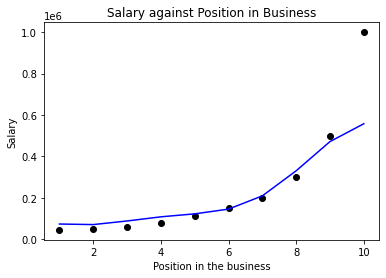

In [18]:
from sklearn.svm import SVR

svr_regressor = SVR(kernel='rbf')

svr_regressor.fit(x_trans,y_trans)

prediction = svr_regressor.predict(x_trans)
prediction = sc_y.inverse_transform(prediction)
plt.scatter(x,y,c='black')
plt.plot(x,prediction,c='b')
plt.xlabel('Position in the business')
plt.ylabel('Salary')
plt.title('Salary against Position in Business')

We have now fitted the model and re-transformed the output for the Y value to plot the predicted values. We can see that the final point does not seem to have been picked up in the prediction.

## Regression Tree

This forms part of CART - Classification and Regression Trees. it is a method that will fit a tree based model to the data to predict the values as best as possible.

Using the same Salary and level data as before let's fit the regression model:

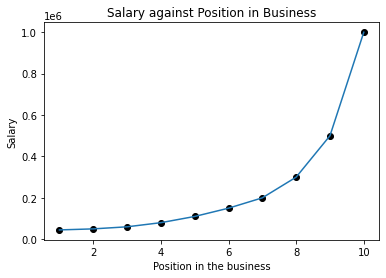

In [19]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x.reshape(-1,1),y.reshape(-1,1))
prediction = tree_reg.predict(x.reshape(-1,1))

plt.scatter(x,y,c='black')
plt.plot (x,prediction)
plt.xlabel('Position in the business')
plt.ylabel('Salary')
plt.title('Salary against Position in Business')
plt.show()

The model is fitting well but this is probably not a good thing as it is too close to the original data we may need to check this by plotting against all the points.

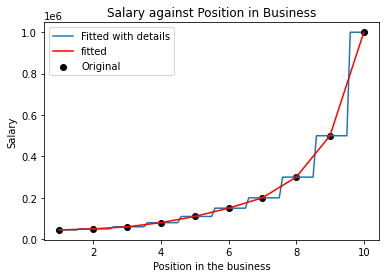

In [20]:
import numpy as np
x_range = np.arange(min(x),max(x),0.1)

plt.scatter(x,y,c='black',label ='Original')
plt.plot (x_range,tree_reg.predict(x_range.reshape(-1,1)),label='Fitted with details')
plt.plot(x,prediction,c='red',label='fitted')
plt.xlabel('Position in the business')
plt.ylabel('Salary')
plt.title('Salary against Position in Business')
plt.legend()
plt.show()

As we can see the data is fitting exactly to the points so we should use caution with this model (But we also only have ten data points and one per level (it may be better to have more data points per level to improve this situation).

In the mean time lets look at a way to visualize the tree model:

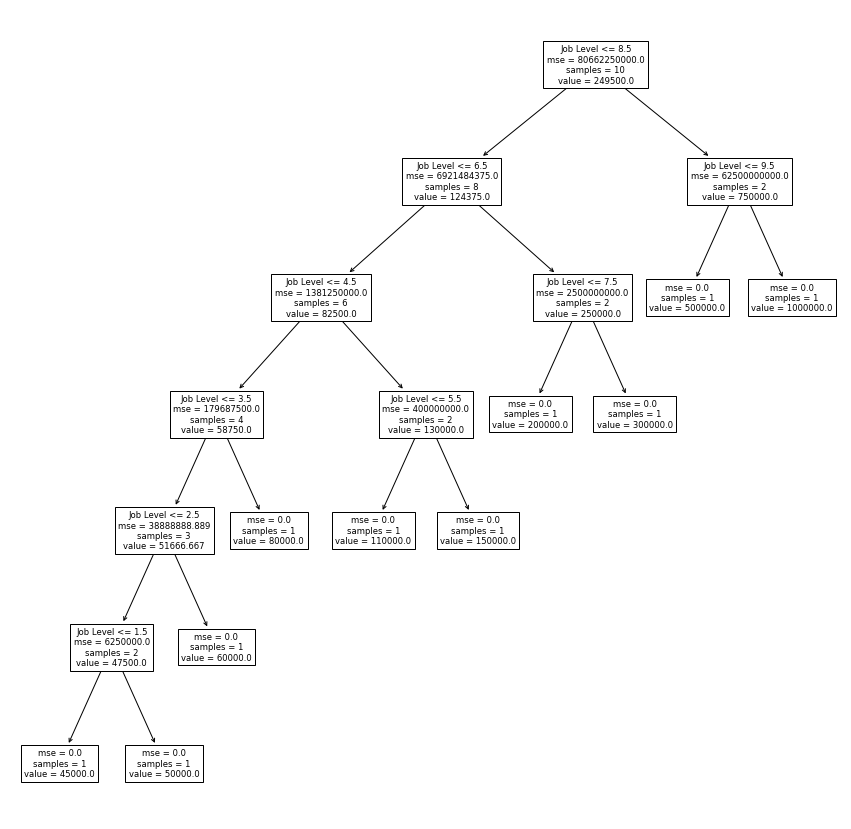

In [21]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15))
plot_tree(tree_reg,feature_names=['Job Level'])
plt.show()

## Random Forest

The final Regression method we will look at is the Random Forest Method, this is an ensemble method that relies on Multiple decision trees to determine a final predictive model.


Again we will use the same dataset as before when fitting this model.

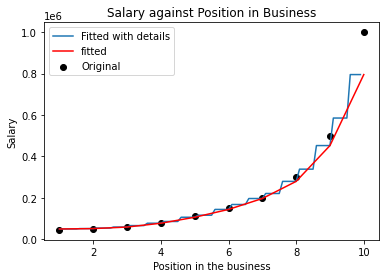

In [22]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(x.reshape(-1,1),y)
prediction = rf_reg.predict(x.reshape(-1,1))
plt.scatter(x,y,c='black',label ='Original')
plt.plot (x_range,rf_reg.predict(x_range.reshape(-1,1)),label='Fitted with details')
plt.plot(x,prediction,c='red',label='fitted')
plt.xlabel('Position in the business')
plt.ylabel('Salary')
plt.title('Salary against Position in Business')
plt.legend()
plt.show()

# Evaluation Metrics

## $R^2$

This score measures how well the independent Variables explain the dependent variable.

it can be calculated using the following code:

In [23]:
from sklearn.metrics import r2_score

r2_score(y,prediction)

0.9447214744195704

Since the value is between 0 and 1 we can see this model shows a good fit but we should always use caution for models that over-fit.

## Mean Square Error (MSE)

This is a cost function metric that measures the average of the squares of the errors, this is a risk function corresponding to the expected value of the squared error loss.

the following code can be used to calculate the metric:

In [24]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y,prediction)

4458890250.0

This is a very big value but it is the average of the squared errors, this of course comes with the issue of overstating the outliers due to the squaring of their values.

Instead there are a few other metrics that are used instead:

## Mean Absolute error (MAE)

Like the MSE this is the average of the errors except instead of squaring the errors to remove the negative terms we use the absolute value.

This will take into account the outliers but will not put a higher weight on them:


this can be calculated using the following:

In [25]:
mean_squared_error(y,prediction)


4458890250.0

## Root Mean Squared Error (RMSE)

This is a measure to determine the error rate for the prediction which places higher weight for larger errors.

The implementation in sk-Learn we can calculate the Mean squared error and take the square root:

In [26]:
import math
rmse = math.sqrt(mean_squared_error(y,prediction))

rmse

66774.92231369499